In [1]:
#Bike Share Dataset - Trends Analysis, Demand Forecasting with Surge Predictions

#Importing pandas and seaborn for mathematical & visualization functions 
import pandas as pd
import seaborn as sns

#to display plots inside the Jupyter notebook
%matplotlib inline 

In [2]:
#Reading bike share data and publishing data into a dataFrame
df_bikeShareData = pd.read_csv('bike_share_data.csv') 
df_bikeShareData.head()

,ride_id,is_member,electric,duration,location,day,day_part,month
0,rid0,0,1,26.5,downtown,Monday,Evening,1
1,rid1,0,1,35.0,venice,Monday,Afternoon,4
2,rid2,0,1,20.5,venice,Wednesday,Afternoon,1
3,rid3,1,1,25.0,downtown,Tuesday,Afternoon,8
4,rid4,0,1,16.5,hollywood,Tuesday,Evening,10


In [3]:
#Exploratory Data Analysis
#Shape of the dataset
df_bikeShareData.shape  #This data has 243889 observations for 8 attributes

(243889, 8)

In [4]:
#Data types for dataset attributes
df_bikeShareData.dtypes

ride_id       object
is_member      int64
electric       int64
duration     float64
location      object
day           object
day_part      object
month          int64
dtype: object

In [5]:
#Provides summary statistics of numerical data such as mean, stdev, min, max, etc
df_bikeShareData.describe() 

,is_member,electric,duration,month
count,243889.000000,243889.000000,243889.000000,243889.000000
mean,0.482478,0.477184,14.270625,6.570050
std,0.499694,0.499480,8.217916,3.266887
min,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,7.500000,4.000000
50%,0.000000,0.000000,13.500000,7.000000
75%,1.000000,1.000000,20.500000,9.000000
max,1.000000,1.000000,52.000000,12.000000


In [6]:
#missing value analysis
df_bikeShareData.isnull().sum()   #No null values

ride_id      0
is_member    0
electric     0
duration     0
location     0
day          0
day_part     0
month        0
dtype: int64

<AxesSubplot:xlabel='location', ylabel='count'>

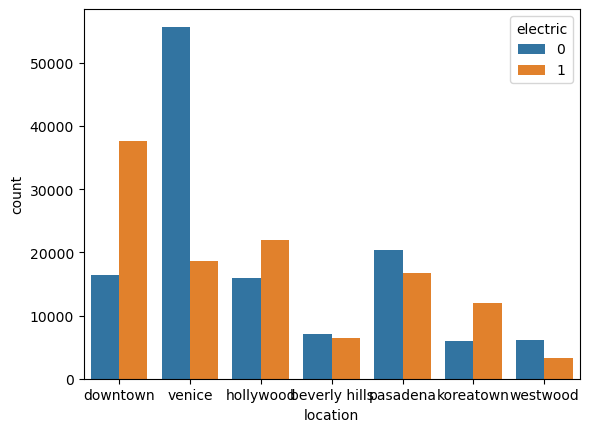

In [7]:
#Visualization
#Count plot for bike rentals at location by bike type
sns.countplot(data = df_bikeShareData, x = 'location',hue='electric')

<AxesSubplot:xlabel='month', ylabel='count'>

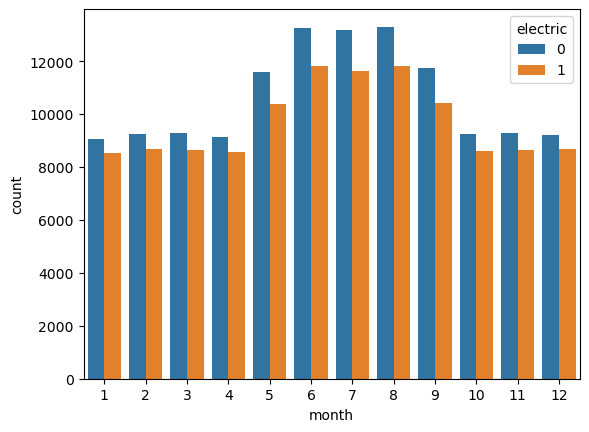

In [8]:
#Count plot for monthly rentals by bike type
sns.countplot(data = df_bikeShareData, x = 'month',hue='electric')

<AxesSubplot:xlabel='day', ylabel='count'>

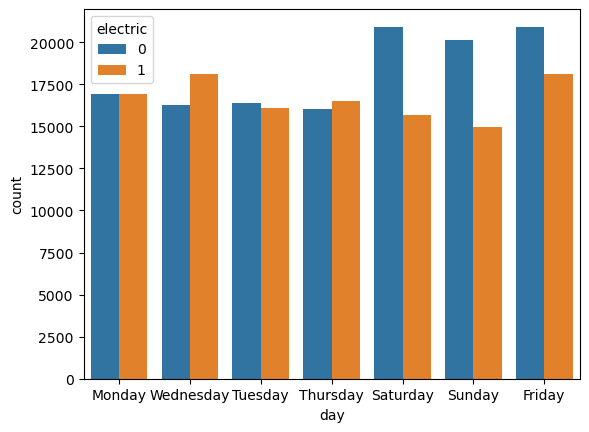

In [9]:
#Count plot for daily rentals by biketype
sns.countplot(data = df_bikeShareData, x = 'day',hue='electric')

<AxesSubplot:xlabel='day_part', ylabel='count'>

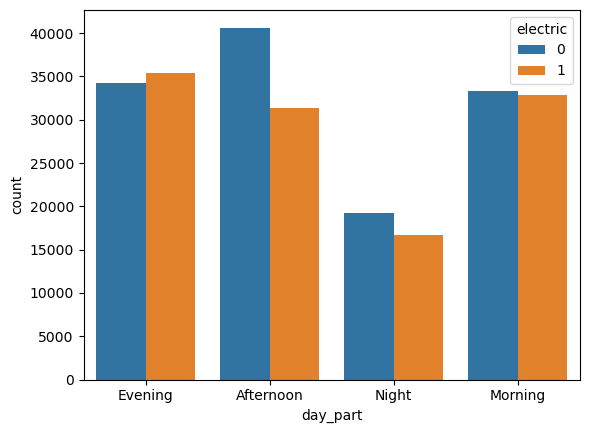

In [10]:
#Count plot for rentals by time of day by bike type
sns.countplot(data = df_bikeShareData, x = 'day_part',hue='electric')

<AxesSubplot:xlabel='location', ylabel='count'>

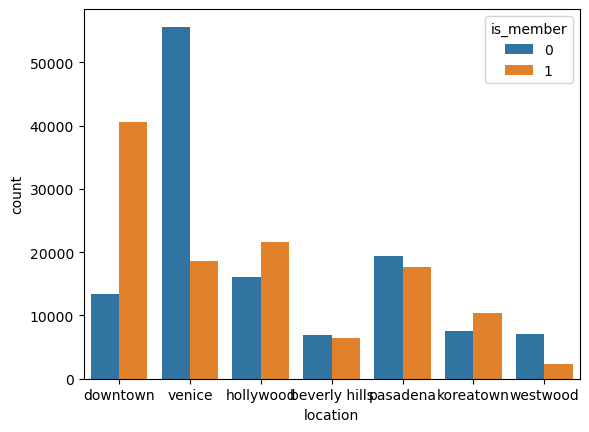

In [11]:
#Count plot for bike rentals at location by membership
sns.countplot(data = df_bikeShareData, x = 'location',hue='is_member')

<AxesSubplot:xlabel='month', ylabel='count'>

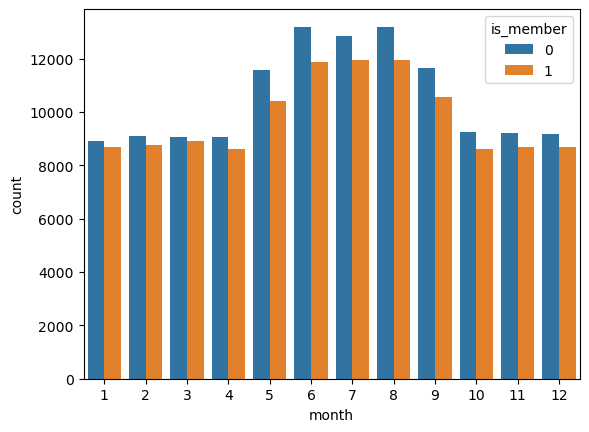

In [12]:
#Count plot for monthly rentals by membership
sns.countplot(data = df_bikeShareData, x = 'month',hue='is_member')

<AxesSubplot:xlabel='day', ylabel='count'>

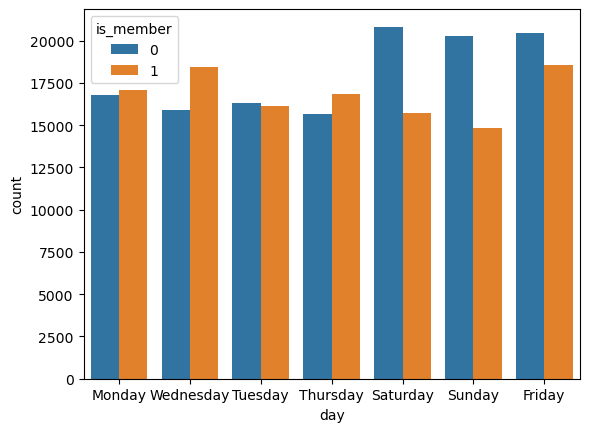

In [13]:
#Count plot for daily rentals by membership
sns.countplot(data = df_bikeShareData, x = 'day',hue='is_member')

<AxesSubplot:xlabel='day_part', ylabel='count'>

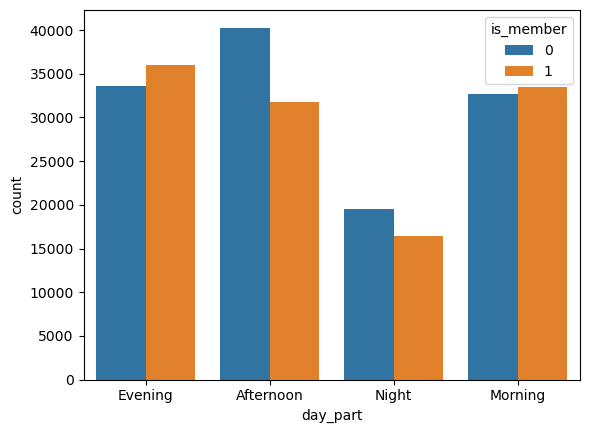

In [14]:
#Count plot for rentals by time of day by membership
sns.countplot(data = df_bikeShareData, x = 'day_part',hue='is_member')

<AxesSubplot:xlabel='location', ylabel='duration'>

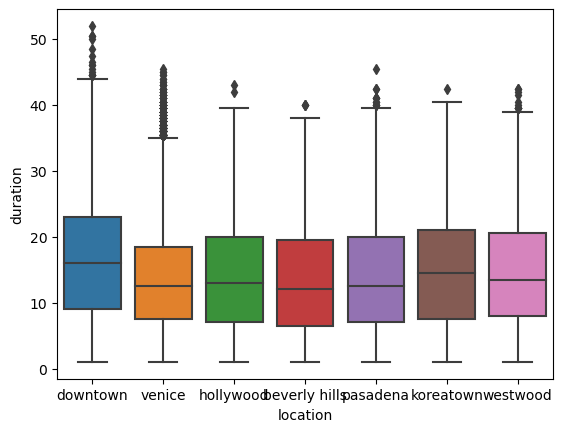

In [15]:
#Plotting relationship between duration of ride and location
sns.boxplot(y = 'duration', x = 'location', data =  df_bikeShareData)

<AxesSubplot:xlabel='month', ylabel='duration'>

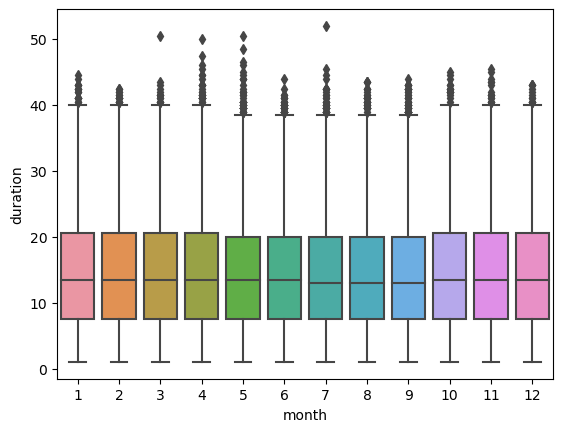

In [16]:
#Plotting relationship between duration of ride and month
sns.boxplot(y = 'duration', x = 'month', data =  df_bikeShareData)

<AxesSubplot:xlabel='day', ylabel='duration'>

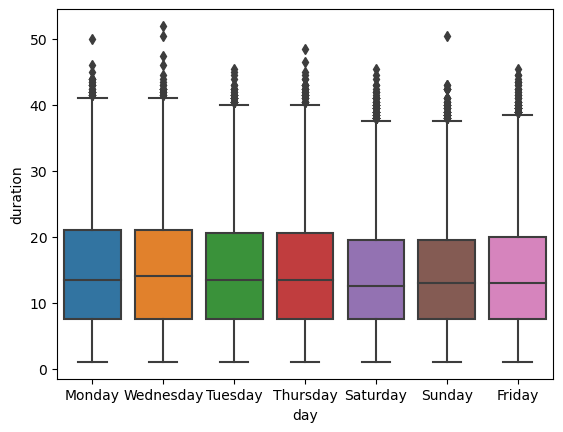

In [17]:
#Plotting relationship between duration of ride and day
sns.boxplot(y = 'duration', x = 'day', data =  df_bikeShareData)

<AxesSubplot:xlabel='day_part', ylabel='duration'>

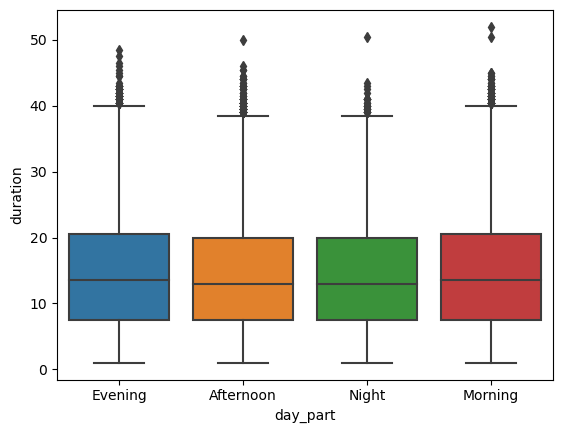

In [18]:
#Plotting relationship between duration of ride and day
sns.boxplot(y = 'duration', x = 'day_part', data =  df_bikeShareData)

<AxesSubplot:xlabel='electric', ylabel='duration'>

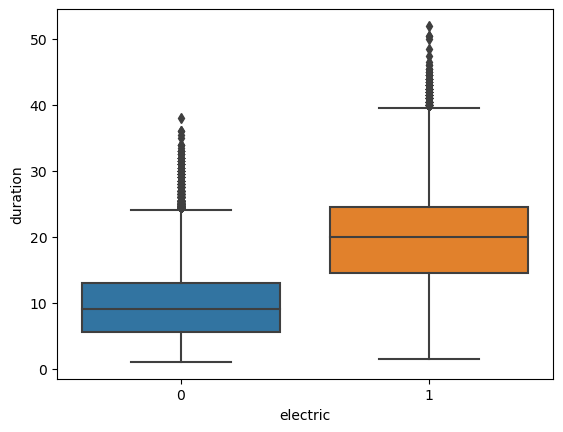

In [19]:
#Plotting relationship between duration of ride and day
sns.boxplot(y = 'duration', x = 'electric', data =  df_bikeShareData)
#Electric bike trips are usually longer

<AxesSubplot:xlabel='is_member', ylabel='duration'>

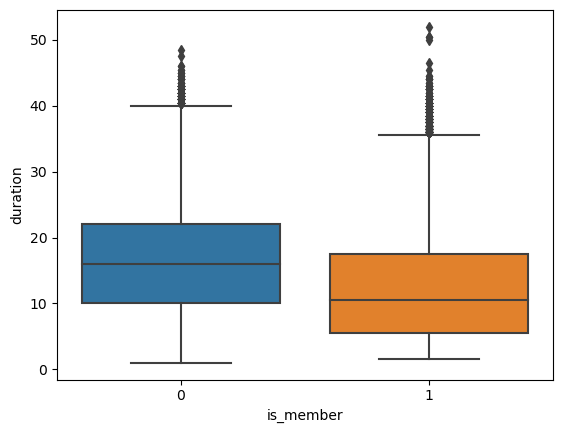

In [20]:
#Plotting relationship between duration of ride and day
sns.boxplot(y = 'duration', x = 'is_member', data =  df_bikeShareData)
#Non-members ride longer

In [21]:
#Aggregating dataframe to create an outcome variable (number of bikes rented) which can be used for linear regression modeling
grouped_data = df_bikeShareData.groupby(['location', 'day', 'day_part', 'month'])['ride_id'].nunique()
result_df = grouped_data.to_frame('unique_ride_count').reset_index()
result_df

,location,day,day_part,month,unique_ride_count
0,beverly hills,Friday,Afternoon,1,31
1,beverly hills,Friday,Afternoon,2,34
2,beverly hills,Friday,Afternoon,3,39
3,beverly hills,Friday,Afternoon,4,35
4,beverly hills,Friday,Afternoon,5,43
...,...,...,...,...,...
2347,westwood,Wednesday,Night,8,12
2348,westwood,Wednesday,Night,9,24
2349,westwood,Wednesday,Night,10,27
2350,westwood,Wednesday,Night,11,26


In [22]:
#Casting dataframe variables into category variables before creating dummy variables
result_df['month']=result_df.month.astype('category')
result_df['location']=result_df.location.astype('category')
result_df['day']=result_df.day.astype('category')
result_df['day_part']=result_df.day_part.astype('category')
#result_df['is_member']=result_df.is_member.astype('category')  Experimented with different regression models and eliminated this variable since it massively decreased r-square value and model fit
#result_df['electric']=result_df.electric.astype('category') Experimented with different regression models and eliminated this variable since it massively decreased r-square value and model fit

In [23]:
result_df.dtypes #Verifying the casting of variables into category variables

location             category
day                  category
day_part             category
month                category
unique_ride_count       int64
dtype: object

In [24]:
#Creating Dummy Variables for regression analysis
UpdatedBikes_df=pd.get_dummies(data=result_df, drop_first = True)
UpdatedBikes_df.head()

,unique_ride_count,location_downtown,location_hollywood,location_koreatown,location_pasadena,location_venice,location_westwood,day_Monday,day_Saturday,day_Sunday,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,39,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,35,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,43,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [25]:
column_names = "','".join(list(UpdatedBikes_df.columns))
column_names = f"'{column_names}'"

In [26]:
column_names

"'unique_ride_count','location_downtown','location_hollywood','location_koreatown','location_pasadena','location_venice','location_westwood','day_Monday','day_Saturday','day_Sunday','day_Thursday','day_Tuesday','day_Wednesday','day_part_Evening','day_part_Morning','day_part_Night','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12'"

In [27]:
#Installing library to perform regression analysis
pip install scikit-learn

SyntaxError: invalid syntax (2853892232.py, line 2)

In [28]:
#import Linear Regression class from the scikit-learn library
from sklearn.linear_model import LinearRegression

In [29]:
#initializing linear regression model
model = LinearRegression()

In [30]:
#Fitting regression model with dummy variables for location, month, day and time of day to predict number of bikes that will be rented
model.fit(UpdatedBikes_df[['location_downtown','location_hollywood','location_koreatown','location_pasadena','location_venice','location_westwood','day_Monday','day_Saturday','day_Sunday','day_Thursday','day_Tuesday','day_Wednesday','day_part_Evening','day_part_Morning','day_part_Night','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12']], UpdatedBikes_df[['unique_ride_count']])

LinearRegression()

In [31]:
#Evaluating adjusted R-square value of regression model
model.score(UpdatedBikes_df[['location_downtown','location_hollywood','location_koreatown','location_pasadena','location_venice','location_westwood','day_Monday','day_Saturday','day_Sunday','day_Thursday','day_Tuesday','day_Wednesday','day_part_Evening','day_part_Morning','day_part_Night','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12']], UpdatedBikes_df[['unique_ride_count']])

#Regression model explains 54.24% of variability in the dataset and demonstrates good fit.

0.5424703257585475

In [32]:
model.intercept_    #Regression intercept coefficient

array([57.26658163])

In [33]:
model.coef_  #Regression independent variable coefficients

array([[120.75595238,  72.61904762,  13.49404762,  70.36011905,
        181.20238095, -11.75892857, -15.37797619,  -7.4077381 ,
        -11.6577381 , -19.30654762, -19.45535714, -13.87202381,
         -4.03061224,  -9.96938776, -61.38605442,   1.50510204,
          1.78571429,   0.40816327,  22.31122449,  38.05102041,
         36.75      ,  38.3877551 ,  23.33163265,   1.35204082,
          1.59183673,   1.36734694]])

In [34]:
#Request for user input of Location, month, day and time of day
UserLocation=input('Please enter your store location from the following options- \nbeverly hills, downtown, hollywood, koreatown, pasadena, venice, westwood:')
UserMonth=input('Please enter the month:')
UserDay=input('Please enter the day of the week:')
UserTimeOfDay=input('Please enter the time of day from the following options- \nMorning, Afternoon, Evening, Night:')

#Updating responses to lower case to avoid issues due to case sensitivity
UserLocation=UserLocation.lower()
UserMonth=UserMonth.lower()
UserDay=UserDay.lower()
UserTimeOfDay=UserTimeOfDay.lower()

#Updated location dummy variables based on user input
location_downtown=0
location_hollywood=0
location_koreatown=0
location_pasadena=0
location_venice=0
location_westwood=0

if UserLocation=='beverly hills':
    location_beverlyhills=1
elif UserLocation=='downtown':
    location_downtown=1
elif UserLocation=='hollywood':
    location_hollywood=1
elif UserLocation=='koreatown':
    location_koreatown=1
elif UserLocation=='pasadena':
    location_pasadena=1
elif UserLocation=='venice':
    location_venice=1
elif UserLocation=='westwood':
    location_westwood=1
else:
    print('Invalid store location.')
    
#Updated day dummy variables based on user input
day_Monday=0
day_Tuesday=0
day_Wednesday=0
day_Thursday=0
day_Friday=0
day_Saturday=0
day_Sunday=0

if UserDay=='monday':
    day_Monday=1
elif UserDay=='tuesday':
    day_Tuesday=1
elif UserDay=='wednesday':
    day_Wednesday=1
elif UserDay=='thursday':
    day_Thursday=1
elif UserDay=='friday':
    day_Friday=1
elif UserDay=='saturday':
    day_Saturday=1
elif UserDay=='sunday':
    day_Sunday=1
else:
    print('Invalid day of the week.')
    
#Updated time of day dummy variables based on user input
day_part_Morning=0
day_part_Afternoon=0
day_part_Evening=0
day_part_Night=0

if UserTimeOfDay=='morning':
    day_part_Morning=1
elif UserTimeOfDay=='afternoon':
    day_part_Afternoon=1
elif UserTimeOfDay=='evening':
    day_part_Evening=1
elif UserTimeOfDay=='night':
    day_part_Night=1
else:
    print('Invalid time of the day.')
    

#Updated month dummy variables based on user input
month_1=0
month_2=0
month_3=0
month_4=0
month_5=0
month_6=0
month_7=0
month_8=0
month_9=0
month_10=0
month_11=0
month_12=0

if UserMonth=='january':
    month_1=1
elif UserMonth=='february':
    month_2=1
elif UserMonth=='march':
    month_3=1
elif UserMonth=='april':
    month_4=1
elif UserMonth=='may':
    month_5=1
elif UserMonth=='june':
    month_6=1
elif UserMonth=='july':
    month_7=1
elif UserMonth=='august':
    month_8=1
elif UserMonth=='september':
    month_9=1
elif UserMonth=='october':
    month_10=1
elif UserMonth=='november':
    month_11=1
elif UserMonth=='december':
    month_12=1

Please enter your store location from the following options- 
beverly hills, downtown, hollywood, koreatown, pasadena, venice, westwood:koreatown
Please enter the month:June
Please enter the day of the week:Wednesday
Please enter the time of day from the following options- 
Morning, Afternoon, Evening, Night:Evening


In [35]:
#Running prediction with linear regression model with dummy variable values & regressions coefficients + intercepts
BikeEstimate= model.intercept_[0] + model.coef_[0][0]*location_downtown + model.coef_[0][1]*location_hollywood + model.coef_[0][2]*location_koreatown+model.coef_[0][3]*location_pasadena + model.coef_[0][4]*location_venice + model.coef_[0][5]*location_westwood + model.coef_[0][6]*day_Monday + model.coef_[0][7]*day_Saturday + model.coef_[0][8]*day_Sunday + model.coef_[0][9]*day_Thursday + model.coef_[0][10]*day_Tuesday + model.coef_[0][11]*day_Wednesday + model.coef_[0][12]*day_part_Evening + model.coef_[0][13]*day_part_Morning + model.coef_[0][14]*day_part_Night + model.coef_[0][15]*month_2 + model.coef_[0][16]*month_3 + model.coef_[0][17]*month_4 + model.coef_[0][18]*month_5 + model.coef_[0][19]*month_6 + model.coef_[0][20]*month_7 + model.coef_[0][21]*month_8 + model.coef_[0][22]*month_9 + model.coef_[0][23]*month_10 + model.coef_[0][24]*month_11 + model.coef_[0][25]*month_12  
BikeEstimate=(BikeEstimate/4) #Diving by 4, since we assume there are 4 weeks in a month, and we want to calculate the demand for a single day of the month
BikeEstimate=round(BikeEstimate,0)
print(f'During {UserMonth}, the estimated number of bikes required at {UserLocation} branch on {UserDay} {UserTimeOfDay} is {BikeEstimate} bikes.')

During june, the estimated number of bikes required at koreatown branch on wednesday evening is 23.0 bikes.


In [36]:
#Surge demand prediction
#If demand levels are higher than historical average values, this will be considered as a surge in demand
grouped_data2 = df_bikeShareData.groupby(['location', 'day', 'day_part', 'month'])['ride_id'].count()
BikeSurgeEstimate=BikeEstimate*4
result_df2 = grouped_data2.to_frame('unique_ride_count').reset_index()
result_df2
grouped_data2 = result_df2.groupby(['location'])['unique_ride_count'].mean()
if UserLocation=='beverly hills':
    if BikeSurgeEstimate>grouped_data2[0]:
        print('There is an expected to be a surge in demand at the store.')
    else:
        print('There is no surge in demand expected at the store.')
elif UserLocation=='downtown':
    if BikeSurgeEstimate>grouped_data2[1]:
        print('There is an expected to be a surge in demand at the store.')
    else:
        print('There is no surge in demand expected at the store.')
elif UserLocation=='hollywood':
    if BikeSurgeEstimate>grouped_data2[2]:
        print('There is an expected to be a surge in demand at the store.')
    else:
        print('There is no surge in demand expected at the store.')
elif UserLocation=='koreatown':
    if BikeSurgeEstimate>grouped_data2[3]:
        print('There is an expected to be a surge in demand at the store.')
    else:
        print('There is no surge in demand expected at the store.')
elif UserLocation=='pasadena':
    if BikeSurgeEstimate>grouped_data2[4]:
        print('There is an expected to be a surge in demand at the store.')
    else:
        print('There is no surge in demand expected at the store.')
elif UserLocation=='venice':
    if BikeSurgeEstimate>grouped_data2[5]:
        print('There is an expected to be a surge in demand at the store.')
    else:
        print('There is no surge in demand expected at the store.')
elif UserLocation=='westwood':
    if BikeSurgeEstimate>grouped_data2[6]:
        print('There is an expected to be a surge in demand at the store.')
    else:
        print('There is no surge in demand expected at the store.')

There is an expected to be a surge in demand at the store.


In [37]:
#Adding safety stock check if a store would like to stock extra bikes to ensure they don't run out of supplies
SafetyStockCheck=input('Would you like to stock surplus bikes in the store as safety stock?: Yes/No')
SafetyStockCheck=SafetyStockCheck.lower()
if SafetyStockCheck=='yes':
    SafetyStock=int(input("Enter percentage (0 to 100) of surplus bikes you would like to stock?:"))
    UpdatedBikeEstimate=round(BikeEstimate*(1+(SafetyStock/100)),0)
    print(f'During {UserMonth}, the estimated number of bikes required at {UserLocation} branch on {UserDay} {UserTimeOfDay} is {UpdatedBikeEstimate} bikes accounting for safety stock.')
else:
    print(f'During {UserMonth}, the estimated number of bikes required at {UserLocation} branch on {UserDay} {UserTimeOfDay} is {BikeEstimate} bikes.')
    


Would you like to stock surplus bikes in the store as safety stock?: Yes/NoYes
Enter percentage (0 to 100) of surplus bikes you would like to stock?:25
During june, the estimated number of bikes required at koreatown branch on wednesday evening is 29.0 bikes accounting for safety stock.


In [39]:
#End of Code